In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data  
import matplotlib.pyplot as plt

In [2]:
BATCH_SIZE = 2000
EPOCH = 1

# Load the input tensor we saved in earlier practice

In [3]:
train_x = torch.load('C:/Users/ADMIN/Desktop/train_x.tensor')  
train_y = torch.load('C:/Users/ADMIN/Desktop/train_y.tensor')  

In [4]:
train_x.shape

torch.Size([25000, 80, 80, 3])

In [5]:
train_y.shape

torch.Size([25000, 1])

# Reshape train_x

In [6]:
train_x = train_x.view(25000, 3, 80, 80)

# Reshape train_y from 25000x1 to 25000

In [7]:
train_y = train_y.view(25000)

In [8]:
train_y.shape

torch.Size([25000])

# Build tensor data set and data loader 

In [9]:
train_x = train_x.type(torch.FloatTensor)

In [10]:
train_y = train_y.type(torch.LongTensor)

In [11]:
torch_dataset = Data.TensorDataset(data_tensor=train_x, target_tensor=train_y)

In [12]:
loader = Data.DataLoader(
    dataset=torch_dataset,     # torch TensorDataset format
    batch_size=BATCH_SIZE,       # mini batch size
    shuffle=True,               # random shuffle for training
    num_workers=2,              # subprocesses for loading data
)

# Define and build CNN

In [13]:
train_x.shape

torch.Size([25000, 3, 80, 80])

In [14]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(         # input shape (3, 80, 80)
            nn.Conv2d(
                in_channels=3,              # input height
                out_channels=12,            # n_filters
                kernel_size=5,              # filter size
                stride=1,                   # filter movement/step
                padding=2,                  # if want same width and length of this image after con2d, padding=(kernel_size-1)/2 if stride=1
            ),                              # output shape (12, 40, 40)
            nn.ReLU(),                      # activation
            nn.MaxPool2d(kernel_size=2),    # choose max value in 2x2 area, output shape (12, 40, 40)
        )
        self.conv2 = nn.Sequential(         # input shape (12, 40, 40)
            nn.Conv2d(12, 36, 5, 1, 2),      # n_filter = 3*12 = 36, output shape (36, 40, 40)
            nn.ReLU(),                      # activation
            nn.MaxPool2d(2),                # output shape (36, 20, 20)
        )
        self.out = nn.Linear(14400, 2) # fully connected layer, output 2 classes

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)           # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        output = self.out(x)
        return output, x    # return x for visualization

In [15]:
cnn = CNN()

In [16]:
cnn

CNN(
  (conv1): Sequential(
    (0): Conv2d (3, 12, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1))
  )
  (conv2): Sequential(
    (0): Conv2d (12, 36, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1))
  )
  (out): Linear(in_features=14400, out_features=2)
)

In [17]:
optimizer = torch.optim.SGD(cnn.parameters(), lr=0.02)

In [18]:
loss_func = torch.nn.CrossEntropyLoss()

# Run one training epoc step by step to examine the variable  

In [19]:
# get one batch of data
for step, (batch_x, batch_y) in enumerate(loader):
    break;

In [20]:
step

0

In [21]:
print(batch_x.shape, batch_y.shape)

torch.Size([2000, 3, 80, 80]) torch.Size([2000])


In [22]:
batch_x = Variable(batch_x)
batch_y = Variable(batch_y)

In [23]:
out = cnn(batch_x)

In [24]:
out

(Variable containing:
 -3.5436e+00 -3.3542e-01
 -1.0777e+01 -1.3940e+01
  4.3370e+00 -6.6690e-01
            ⋮            
 -9.3151e+00 -5.9409e+00
  1.1333e+01 -1.6130e+01
 -2.0611e+00 -1.5537e+01
 [torch.FloatTensor of size 2000x2], Variable containing:
    0.0000    0.0000    0.0000  ...     0.0000    0.0000    0.0000
    0.0000    0.0000    0.0000  ...     0.0000    0.0000    0.0000
    0.0000    0.0000    0.0000  ...     0.0000    0.0000    0.0000
              ...                ⋱                ...             
    0.0000    0.0000    0.0000  ...     0.0000    0.0000    0.0000
    0.0000    0.0000    0.0000  ...     0.0000    0.0000    0.0000
    0.0000    0.0000    0.0000  ...     0.0000    0.0000    0.0000
 [torch.FloatTensor of size 2000x14400])

In [25]:
out[0]

Variable containing:
-3.5436e+00 -3.3542e-01
-1.0777e+01 -1.3940e+01
 4.3370e+00 -6.6690e-01
           ⋮            
-9.3151e+00 -5.9409e+00
 1.1333e+01 -1.6130e+01
-2.0611e+00 -1.5537e+01
[torch.FloatTensor of size 2000x2]

In [26]:
loss = loss_func(out[0], batch_y)
print(loss)

Variable containing:
 4.4739
[torch.FloatTensor of size 1]



In [27]:
loss.data[0]

4.4739227294921875

# Train the MLP 

In [28]:
losslst = []
for epoch in range(EPOCH):   # train entire dataset EPOCH times
    for step, (batch_x, batch_y) in enumerate(loader):  # for each training step
        print('Epoch:', epoch, '| step:', step, end = ' ')
        #print('| batch_x:', batch_x.shape, '| batch_y: ', batch_y.shape, end = '')
        batch_x = Variable(batch_x)
        batch_y = Variable(batch_y)
        out = cnn(batch_x)[0]
        #print('| out: ', out.shape, end = '')
        loss = loss_func(out, batch_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        print('train loss: ', loss.data[0])
        losslst.append(loss.data[0])
    epoch = epoch + 1

Epoch: 0 | step: 0 train loss:  4.628905296325684
Epoch: 0 | step: 1 train loss:  4641410.5
Epoch: 0 | step: 2 train loss:  34.29240798950195
Epoch: 0 | step: 3 train loss:  0.6930195093154907
Epoch: 0 | step: 4 train loss:  0.6929667592048645
Epoch: 0 | step: 5 train loss:  0.6931192278862
Epoch: 0 | step: 6 train loss:  0.6933645606040955
Epoch: 0 | step: 7 train loss:  0.6931586861610413
Epoch: 0 | step: 8 train loss:  0.6932445168495178
Epoch: 0 | step: 9 train loss:  0.6933032870292664
Epoch: 0 | step: 10 train loss:  0.6931744813919067
Epoch: 0 | step: 11 train loss:  0.6932415962219238
Epoch: 0 | step: 12 train loss:  0.692874550819397


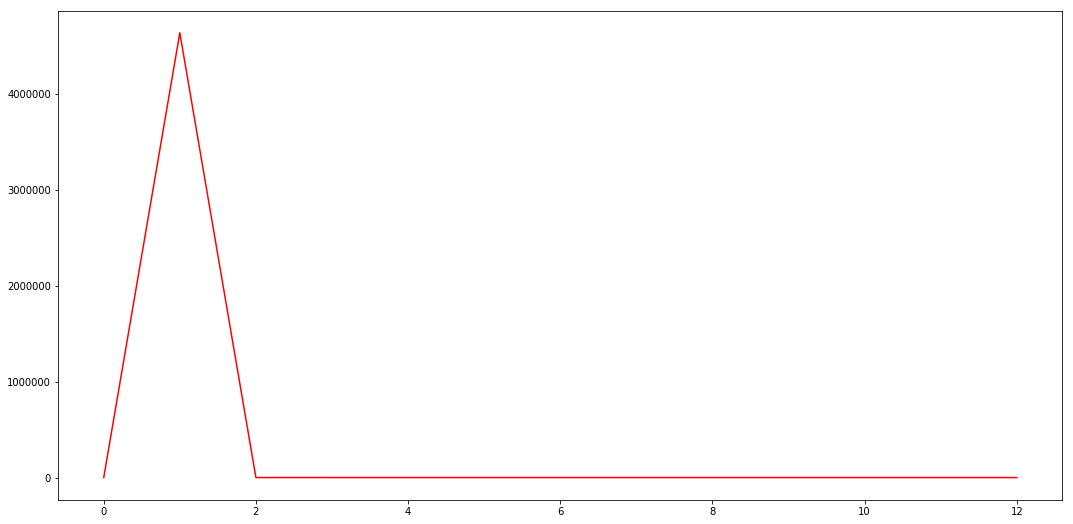

In [29]:
plt.figure(figsize=(18,9)) # set the figure size to 18 x 9 inches
plt.plot(losslst, color = 'red')
plt.show()